# Transformações e Histograma
Esse projeto aborda diversas transformações realizadas em imagens utilizando Python, como transformações logarítmicas e de potência, além da visualização do planos de bits de uma imagem.

## Descrição
O objetivo é aplicar e visualizar as diferentes técnicas de processamento de imagens e analisar os resultados.


## Código

- **Transformação logarítmicas**

    É útil para comprimir a faixa dinâmica de uma imagem, especialmente se ela contém valores de intensidade de brilho que variam em uma faixa muito grande. Útil no realce de detalhes em imagens que possuem regiões escuras e claras, como imagens de radiografia médica.
    
    A fórmula é
    **s = c ⋅ log(1 + r)**
    onde:
    
    **s:** valor de pixel resultante.

    **r**: valor de pixel original.
    
    **c**: constante de escala que ajusta a intensidade.

    ```python
    def logaritmica(imagem, contraste, brilho):
    npImg = np.array(imagem)
    c = contraste
    img = c * np.log(1 + npImg) + brilho
    img = np.clip(img, 0, 255).astype(np.uint8)
    img = Image.fromarray(img)
    return img
    ```

- **Transformação de potência**

    A transformação de potência ajusta a relação entre os valores de entrada e saída de intensidade de brilho da imagem. Útil para correção de brilho e contraste em imagens onde a distribuição de intensidade não está adequada.

    A fórmula é
    **s = c ⋅ r^γ**
    onde:

    **s:** valor de pixel resultante.

    **c**: constante de escala.

    **r**: valor de pixel original.

    **γ**: expoente gama que controla o realce da imagem.

        Se γ > 1, a imagem escurece.

        Se γ < 1, a imagem clareia.

    ```python
    def potencia(imagem, c, gama):
    npImg = np.array(imagem)
    img = c * np.power(npImg, gama)
    img = np.clip(img, 0, 255).astype(np.uint8)
    img = Image.fromarray(img)
    return img
    ```

- **Vizualização plano de bits**

    A ideia do plano de bits é decompor os bits de cada canal de uma imagem em imagens binárias distintas, onde em uma imagem 8 bits tons de cinza:

    - O plano de bit 0 representa o bit menos significativo (mais sujeito a ruído e pequenas variações).
    - O plano de bit 7 representa o bit mais significativo (captura a maior parte da estrutura visual da imagem).

    ```python
    def planoDeBits(imagem):
    img = np.array(imagem)
    bit_planes = [(img >> i) & 1 for i in range(8)]
    
    fig, ax = plt.subplots(nrows=3, ncols=3)
    ax[0,0].imshow(bit_planes[0], cmap='gray')
    ax[0,0].set_title("Bit 0")
    ax[0,1].imshow(bit_planes[1], cmap='gray')
    ax[0,1].set_title("Bit 1")
    ax[0,2].imshow(bit_planes[2], cmap='gray')
    ax[0,2].set_title("Bit 2")
    ax[1,0].imshow(bit_planes[3], cmap='gray')
    ax[1,0].set_title("Bit 3")
    ax[1,1].imshow(bit_planes[4], cmap='gray')
    ax[1,1].set_title("Bit 4")
    ax[1,2].imshow(bit_planes[5], cmap='gray')
    ax[1,2].set_title("Bit 5")
    ax[2,0].imshow(bit_planes[6], cmap='gray')
    ax[2,0].set_title("Bit 6")
    ax[2,1].imshow(bit_planes[7], cmap='gray')
    ax[2,1].set_title("Bit 7")
    ax[2,2].imshow(imagem, cmap='gray')
    ax[2,2].set_title("Original")
    plt.show()
    ```
    ### Codigo final

Escolha a imagem: 
1 - Fig 3.8 (fractured_spine)
2 - Enhance me
3 - Outra


C:\Users\bruno\AppData\Local\Temp\ipykernel_52528\1439011060.py:35: RuntimeWarning: divide by zero encountered in log
  img = c * np.log(1 + npImg) + brilho


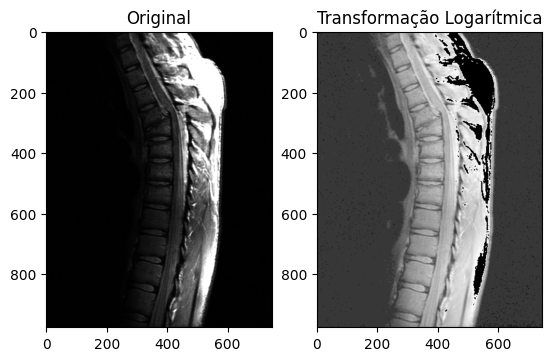

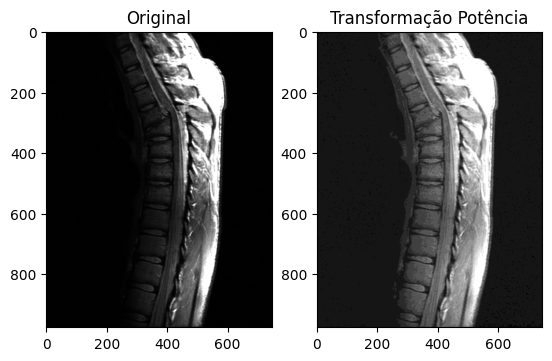

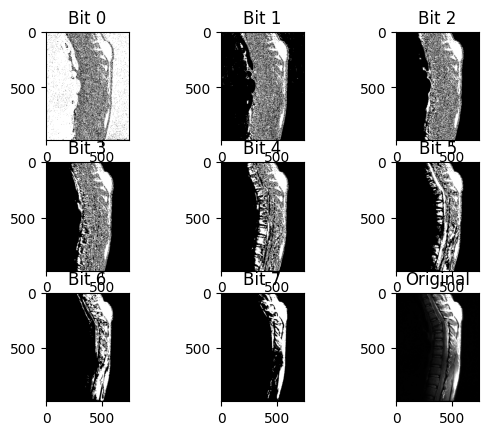

In [ ]:
import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def plot3(img1, img2, img3, txt1, txt2, txt3):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(txt2)
    ax[2].imshow(img3, cmap='gray')
    ax[2].set_title(txt3)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def logaritmica(imagem, contraste, brilho):
    npImg = np.array(imagem)
    c = contraste
    img = c * np.log2(1 + npImg) + brilho
    img = np.clip(img, 0, 255).astype(np.uint8)
    img = Image.fromarray(img)
    return img

def pot2encia(imagem, c, gama):
    npImg = np.array(imagem)
    img = c * np.power(npImg, gama)
    img = np.clip(img, 0, 255).astype(np.uint8)
    img = Image.fromarray(img)
    return img

def negativo(npImg):
    return 255 - npImg

def medianaScipy(npImg):
    r = 3
    return Image.fromarray(scipy.ndimage.median_filter(npImg, size=r))

def planoDeBits(imagem):
    img = np.array(imagem)
    bit_planes = [(img >> i) & 1 for i in range(8)]
    
    fig, ax = plt.subplots(nrows=3, ncols=3)
    ax[0,0].imshow(bit_planes[0], cmap='gray')
    ax[0,0].set_title("Bit 0")
    ax[0,1].imshow(bit_planes[1], cmap='gray')
    ax[0,1].set_title("Bit 1")
    ax[0,2].imshow(bit_planes[2], cmap='gray')
    ax[0,2].set_title("Bit 2")
    ax[1,0].imshow(bit_planes[3], cmap='gray')
    ax[1,0].set_title("Bit 3")
    ax[1,1].imshow(bit_planes[4], cmap='gray')
    ax[1,1].set_title("Bit 4")
    ax[1,2].imshow(bit_planes[5], cmap='gray')
    ax[1,2].set_title("Bit 5")
    ax[2,0].imshow(bit_planes[6], cmap='gray')
    ax[2,0].set_title("Bit 6")
    ax[2,1].imshow(bit_planes[7], cmap='gray')
    ax[2,1].set_title("Bit 7")
    ax[2,2].imshow(imagem, cmap='gray')
    ax[2,2].set_title("Original")
    plt.show()

def outra():
    print("Digite o nome da imagem: ")
    entrada = input()
    imagem = Image.open(f'imgs/{entrada}')

    print("Escolha a transformação: ")
    print("1 - Logarítmica")
    print("2 - pot2ência")

    entrada = input()

    match entrada:
        case "1":
            contraste = int(input("Digite o contraste: "))
            brilho = int(input("Digite o brilho: "))
            log2 = logaritmica(np.array(imagem), contraste, brilho)
            plot(imagem, log2, "Original", "Transformação Logarítmica")
        case "2":
            c = int(input("Digite o valor de c: "))
            gama = float(input("Digite o valor de gama: "))
            pot2 = pot2encia(np.array(imagem), c, gama)
            plot(imagem, pot2, "Original", "Transformação pot2ência")
        case _:
            print("Opção inválida")
            exit()
    exit()

def main():
    fig38 = Image.open('imgs/Fig0308(a)(fractured_spine).tif')
    enhanceMe = Image.open('imgs/enhance-me.gif')
    enhanceMe = enhanceMe.convert('RGB')

    log1 = logaritmica(np.array(fig38), 30, 20)

    pot1 = pot2encia(np.array(fig38), 1, 0.45)

    log2 = medianaScipy(np.array(enhanceMe))
    log2 = logaritmica(log2, 50, -20)
    log2 = medianaScipy(np.array(log2))

    pot2 = medianaScipy(np.array(enhanceMe))
    pot2 = pot2encia(np.array(pot2), 1.75, 1.55)
    pot2 = medianaScipy(np.array(pot2))

    
    plot(fig38, log1, "Original", "Transformação Logarítmica")
    plot(fig38, pot1, "Original", "Transformação potência")
    planoDeBits(fig38.convert('L'))

    plot(enhanceMe, log2, "Original", "Transformação Logarítmica")
    plot(enhanceMe, pot2, "Original", "Transformação potência")
    planoDeBits(enhanceMe.convert('L'))

if __name__ == "__main__":
    main()